# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [41]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [42]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [43]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [44]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [45]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

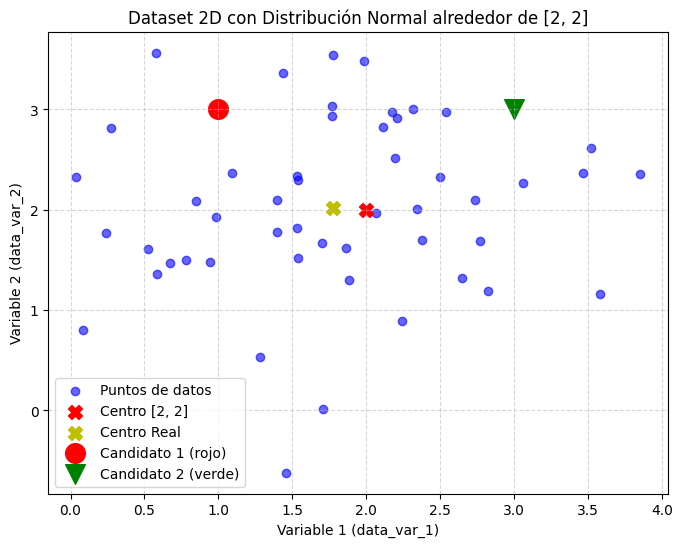

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


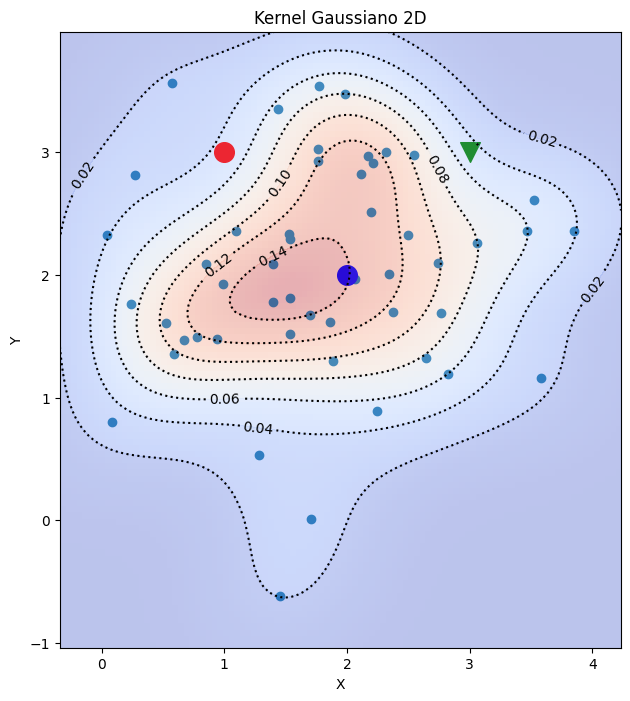

In [46]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

In [47]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal([2,1], 50, ds_center)

dx2, dy2 = cargar_datasetRelacionCuadratica([1, 0, 0], 50, (-5, 5))

In [48]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [49]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov
cov_normal = np.cov(dx,dy)
cov_relacion_lineal = np.cov(dxr,dyr)
cov_relacion_cuadratica = np.cov(dx2,dy2)
cov_grande = np.cov(dxGrande,dyGrande)
print(f'Covarianza dataset con distribución normal:\n')
print(cov_normal, '\n')
print(f'Covarianza dataset con relación lineal :\n')
print(cov_relacion_lineal,'\n')
print(f'Covarianza dataset con relación lineal Grande:\n')
print(cov_grande,'\n')
print(f'Covarianza dataset con relación cuadratica:\n')
print(cov_relacion_cuadratica,'\n')

Covarianza dataset con distribución normal:

[[0.87173739 0.08985489]
 [0.08985489 0.76444418]] 

Covarianza dataset con relación lineal :

[[3.48694958 3.66665937]
 [3.66665937 4.61081334]] 

Covarianza dataset con relación lineal Grande:

[[383.54554143 375.65364293]
 [375.65364293 467.25326789]] 

Covarianza dataset con relación cuadratica:

[[ 8.34535038 -2.48409573]
 [-2.48409573 60.72673368]] 



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

Respuesta: El de relación Lineal

¿Cual es el problema que tiene la covarianza?

Respuesta: Depende de la escala de las variables.


In [50]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef
corr_normal = np.corrcoef(dx,dy)
corr_relacion_lineal = np.corrcoef(dxr,dyr)
corr_grande = np.corrcoef(dxGrande,dyGrande)
print(f'Correlación dataset con distribución normal:\n')
print(corr_normal, '\n')
print(f'Correlación dataset con relación lineal :\n')
print(corr_relacion_lineal,'\n')
print(f'Correlación dataset con relación lineal Grande:\n')
print(corr_grande,'\n')
print(f'Correlación dataset con relación cuadratica:\n')
print(cov_relacion_cuadratica,'\n')

Correlación dataset con distribución normal:

[[1.         0.11007179]
 [0.11007179 1.        ]] 

Correlación dataset con relación lineal :

[[1.         0.91444789]
 [0.91444789 1.        ]] 

Correlación dataset con relación lineal Grande:

[[1.         0.88736636]
 [0.88736636 1.        ]] 

Correlación dataset con relación cuadratica:

[[ 8.34535038 -2.48409573]
 [-2.48409573 60.72673368]] 



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

Respuesta: La relación lineal

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

Respuesta: La correlación de Pearson es la medida más simple e intuitiva

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [51]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm
import numpy as np

def norma_p(x, y, p):
    x = np.array(x)
    y = np.array(y)
    return np.linalg.norm(x - y, ord=p)


In [52]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord= 1)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist

In [53]:
def distancia_manhattan(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=2)
   print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
   return dist

In [54]:
# ← COMPLETAR Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
import scipy.spatial.distance as dis

def distancia_Chebyshev(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=np.inf)
   print(f'Distancia Chebyshev del punto {p1} al punto {p2} = {dist}')
   return dist

def similitud_coseno(p1, p2):
   dist = dis.cosine(p1, p2)
   print(f'Similitud coseno del punto {p1} al punto {p2} = {dist}')
   return dist

def distancia_mahalanobis(p1, p2, mC):
    if np.linalg.det(mC) == 0:
      print("La matriz de covarianza es singular")
      print("Se estabilixa añadiendo un valor a la diagonal")
      epsilon = 1e-6
      mC = mC + epsilon * np.eye(mC.shape[0])
    mCi = np.linalg.inv(mC)
    return mahalanobis(p1,p2,mCi)

def distancia_jaccard(p1, p2):
   dist = dis.jaccard(p1, p2)
   print(f'Distancia Jaccard del punto {p1} al punto {p2} = {dist}')
   return dist

In [55]:
def imprimir_distancias(centro, c1, c2, cov=None):
    print("Distancia Euclidiana")
    print(f"  c1 → {distancia_euclidiana(c1, centro):.4f}")
    print(f"  c2 → {distancia_euclidiana(c2, centro):.4f}")

    print("\nDistancia Manhattan")
    print(f"  c1 → {distancia_manhattan(c1, centro):.4f}")
    print(f"  c2 → {distancia_manhattan(c2, centro):.4f}")

    print("\nDistancia Chebyshev")
    print(f"  c1 → {distancia_Chebyshev(c1, centro):.4f}")
    print(f"  c2 → {distancia_Chebyshev(c2, centro):.4f}")

    print("\nSimilitud Coseno")
    print(f"  c1 → {similitud_coseno(c1, centro):.4f}")
    print(f"  c2 → {similitud_coseno(c2, centro):.4f}")

    if cov is not None:
        print("\nDistancia Mahalanobis")
        print(f"  c1 → {distancia_mahalanobis(c1, centro, cov):.4f}")
        print(f"  c2 → {distancia_mahalanobis(c2, centro, cov):.4f}")

    print("\nDistancia Jaccard")
    print(f"  c1 → {distancia_jaccard(c1, centro):.4f}")
    print(f"  c2 → {distancia_jaccard(c2, centro):.4f}")



In [56]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")
print('Distancias primer dataset:\n')
print('-'*40)
ds_center = np.array([np.mean(dx), np.mean(dy)])
imprimir_distancias(
    centro=ds_center,
    c1=c1,
    c2=c2,
    cov=cov_normal
)

# ← COMPLETAR, calcule el centro del segundo dataset
print('-'*40)
print('Distancias segundo dataset:\n')
print('-'*40)
ds_center = data_center_b = np.array([np.mean(dxr), np.mean(dyr)])
imprimir_distancias(
    centro=ds_center,
    c1=c1,
    c2=c2,
    cov=cov_relacion_lineal
)
print('-'*40)
print('Distancias tercer dataset:\n')
print('-'*40)
ds_center = data_center_b = np.array([np.mean(dx2), np.mean(dy2)])
imprimir_distancias(
    centro=ds_center,
    c1=c1,
    c2=c2,
    cov=cov_relacion_cuadratica
)

print('-'*40)
print('Distancias cuarto dataset:\n')
print('-'*40)
ds_center = data_center_b = np.array([np.mean(dxGrande), np.mean(dyGrande)])
imprimir_distancias(
    centro=ds_center,
    c1=c1,
    c2=c2,
    cov=cov_grande
)

🔍 calculando las distancias de los puntos candidatos al centro
Distancias primer dataset:

----------------------------------------
Distancia Euclidiana
Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
  c1 → 1.7567
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
  c2 → 2.2077

Distancia Manhattan
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.2508577416548483
  c1 → 1.2509
Distancia manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 1.5705224324671165
  c2 → 1.5705

Distancia Chebyshev
Distancia Chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822191295320475
  c1 → 0.9822
Distancia Chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.2254739052561403
  c2 → 1.2255

Similitud Coseno
Similitud coseno del punto [1 3] al punto [1.77452609 2.01778087] = 0.07877984689399442
  c1 → 0.0788
Similitud coseno del punto [3 3] al punto [1.77452609 2.0177

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?
¿Qué medidas de disimilitud son de un punto a una distribución?

Respuesta:

Punto a Punto:

Distancia Euclidiana

Distancia Manhattan

Distancia Chebyshev

Similitud (o distancia) de Coseno

Punto a Distribución:

Distancia de Mahalanobis

Distancia de Jaccard
¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Sí tiene en cuenta la distribución real de los datos

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [57]:
import itertools as it
#  TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))

    for i, j in it.product(range(n_samples), repeat=2):
        if mC is not None:
            mD[i, j] = distancia(X[i], X[j], mC)
        else:
            mD[i, j] = distancia(X[i], X[j])

    return mD

In [58]:
 # ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis
# calculamos primero la matriz de covarianzas
X = np.column_stack((dx, dy))
Ma_euclidea = matriz_distancias(X, distancia_euclidiana)
print("Matriz de distancias Euclidea:\n", Ma_euclidea)
mC = np.cov(X, rowvar=False)
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print("Matriz de distancias Mahalanobis:\n", Ma_mahalanobis)


Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.344144703993529
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1519803547902132
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.3139080228428655
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.4377830808357248
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.3380472596818171
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 2.245800155113592
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.9040169213876856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9733680009549539
Distancia euclidiana del punto [2.49

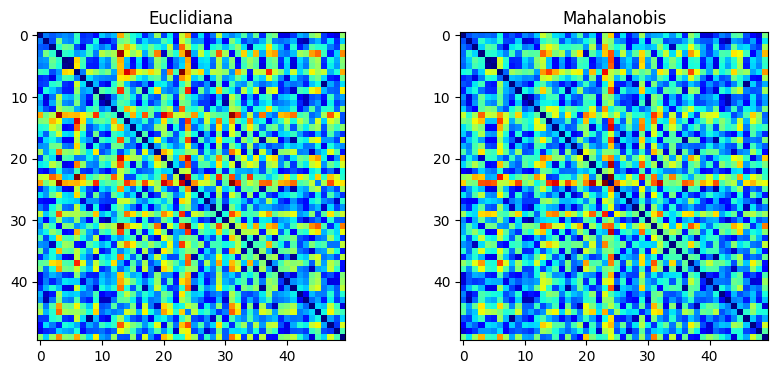

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidiana')

ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

plt.show()


In [60]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    # complete
    return 1 / (1 + mD)

Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.344144703993529
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1519803547902132
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.3139080228428655
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.4377830808357248
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.3380472596818171
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 2.245800155113592
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.9040169213876856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9733680009549539
Distancia euclidiana del punto [2.49

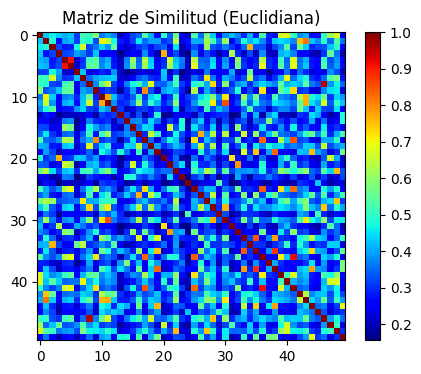

In [61]:
# Complete 4.3 Grafique la matriz de similitud
Ma_similitud = matriz_similitud(X, distancia_euclidiana)

plt.figure(figsize=(5, 4))
plt.imshow(Ma_similitud, cmap='jet')
plt.title('Matriz de Similitud (Euclidiana)')
plt.colorbar()
plt.show()


# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

Respuesta: El gráfico de una medida de disimilitud es más fácil de interpretar

# 🚀 ¡TALLER FINALIZADO!"